This notebook shows a simple example of regression, polynomial regression.  It uses scikit-learn ('sklearn') for fitting functions and matplotlib for plotting.

We will use polynomial regression here because everyone is already familiar with it and we can make 2d plots (using just one axis since data only has two features X and Y).  However, polynomial regression (of high orders) is usually not a good idea in practice.

Polynomial regression is a special case of linear regression (where the features are chosen to be powers of the original X feature).

#### Load libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#### Define a ground-truth deterministic function f() for Y=f(X)+$\epsilon$ 

In [2]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

#### Define a function to generate i.i.d. samples, first generating X and then Y=f(X)+$\epsilon$ 

We will generate X as i.i.d. Uniform(0,10) and the noise $\epsilon$ as i.i.d. $N(0,\sigma^2)$

In [3]:
def get_data(n=100,sigma=1):
    """Generate a data set with n samples using Gaussian noise with variance sigma^2"""
    X = np.random.uniform(0,10,n)
    Y = f(X)+ np.random.normal(0, sigma, n)
    return X,Y

### Part 1: Let's generate a small data set and plot it to get visual intuition

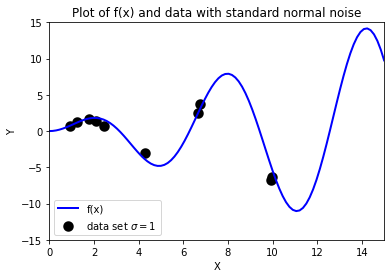

In [4]:
n = 10
sigma = 1

#iid samples to plot
X,Y = get_data(n,sigma)


plt.figure()

#draw a curve of f(x) for reference
x_curve = np.linspace(0, 15,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, color='blue', label='f(x)',linewidth=2)

#plot the samples
plt.scatter(X, Y, marker='o', s=30,color='black',label=r'data set $\sigma=1$',linewidth=5) #plot the data points

#modify plot
plt.xlabel("X")
plt.ylabel("Y")
# set axes range
plt.xlim(0, 15)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and data with standard normal noise')
plt.legend(loc='lower left')
plt.show()

### Let's generate several small data sets with different noise variances

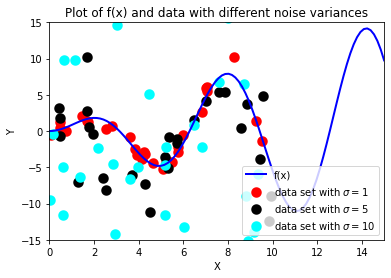

In [5]:
n = 30
sigmas = [1, 5, 10]
colors = ['red', 'black', 'cyan']

plt.figure()

#we will draw a curve of f(x) for reference
x_curve = np.linspace(0, 15,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, color='blue', label='f(x)',linewidth=2)


#iid samples to plot
for (sigma_,color_) in zip(sigmas,colors):
    
    X,Y = get_data(n,sigma_)
    label_ = r'data set with $\sigma=$%i'%(sigma_)
    
    plt.scatter(X, Y, marker='o', s=30,color=color_,label=label_,linewidth=5) #plot the data points

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 15)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and data with different noise variances')
plt.legend(loc='lower right')
plt.show()

### Let's visualize a polynomials fit to a data set

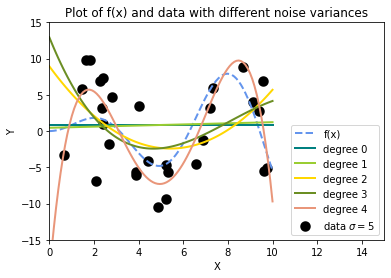

In [6]:
n = 30
sigma_ = 5
colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html


plt.figure()

#draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)


#iid samples to plot
    
X,Y = get_data(n,sigma_)
label_ = r'data $\sigma=$%i'%(sigma_)

plt.scatter(X, Y, marker='o', s=30,color='black',label=label_,linewidth=5) #plot the data points


#now fit for multiple polynomials (each power is treated as a separate feature in a linear regression model)
for count, degree in enumerate([0,1,2,3,4]):
    
    model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
    model.fit(X[:,np.newaxis], Y)
    
    #plot the fitted function
    y_plot_fit = model.predict(x_curve[:,np.newaxis])
    plt.plot(x_curve, y_plot_fit, color=colors_fit[count], linewidth=2,
             label="degree %d" % degree)

    
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 15)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and data with different noise variances')
plt.legend(loc='lower right')
plt.show()

### Part 2: What happens for different data sets (same number of samples $n$, same $f(x)$, same noise variance $\sigma^2$)

We will generate multiple data sets with $n=30$ samples.  For each we will fit polynomials, then plot all the polynomials together. (the code below uses a different data set for each degree of the polynomials to simplify plotting)

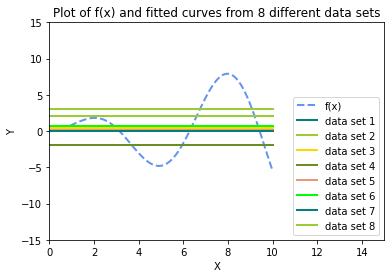

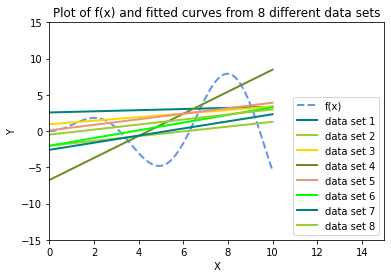

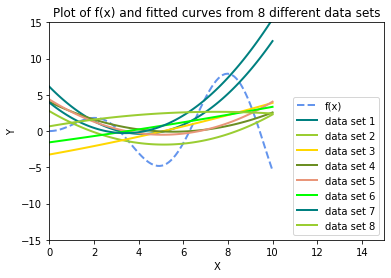

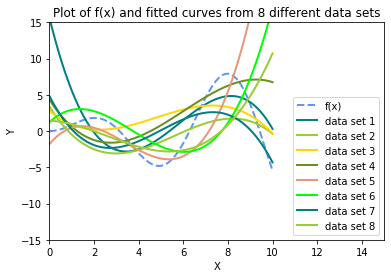

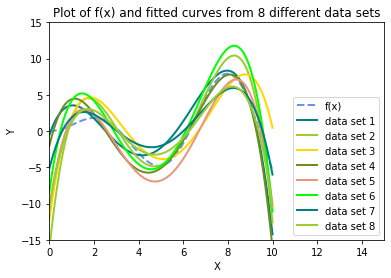

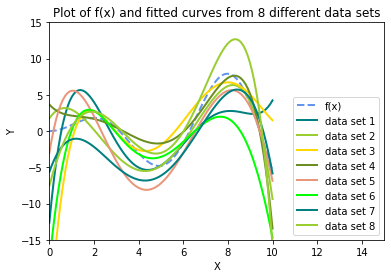

In [7]:
n_samples = 30
sigma_ = 5
n_datasets = 8
max_degree = 5 

colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html

for degree in range(max_degree+1):
    
    #make a separate figure for each order (constants, linear, quadratic, etc.)
    plt.figure()

    #we will draw a curve of f(x) for reference
    x_curve = np.linspace(0, 10,100)
    y_curve = f(x_curve)
    plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)

    
    for i in range(n_datasets):
        
        #iid samples 
        X,Y = get_data(n_samples,sigma_)

        model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
        model.fit(X[:,np.newaxis], Y)

        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[i%len(colors_fit)], linewidth=2,
                 label="data set %i" % (i+1))



    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, 15)
    plt.ylim(-15, 15)
    plt.title('Plot of f(x) and fitted curves from %i different data sets' %n_datasets )
    plt.legend(loc='lower right')
    plt.show()

#### What if we repeat that, but with *lots* of data?

First, one data set with many samples (for this we will visualize the data set)

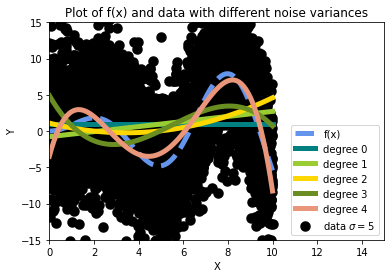

In [8]:
n = 5000
sigma_ = 5
colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html


plt.figure()

#draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=5)


#iid samples to plot
    
X,Y = get_data(n,sigma_)
label_ = r'data $\sigma=$%i'%(sigma_)

plt.scatter(X, Y, marker='o', s=30,color='black',label=label_,linewidth=5) #plot the data points


#now fit for multiple polynomials (each power is treated as a separate feature in a linear regression model)
for count, degree in enumerate([0,1,2,3,4]):
    
    model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
    model.fit(X[:,np.newaxis], Y)
    
    #plot the fitted function
    y_plot_fit = model.predict(x_curve[:,np.newaxis])
    plt.plot(x_curve, y_plot_fit, color=colors_fit[count], linewidth=5,
             label="degree %d" % degree)

    
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 15)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and data with different noise variances')
plt.legend(loc='lower right')
plt.show()

Next, multiple data sets, each with many samples

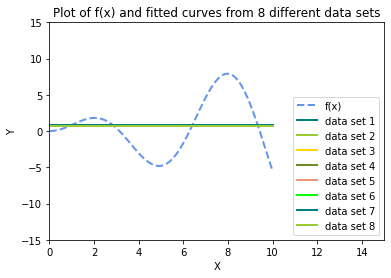

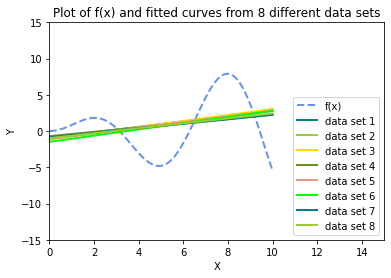

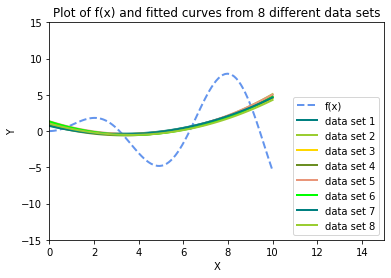

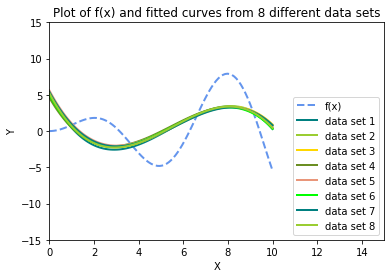

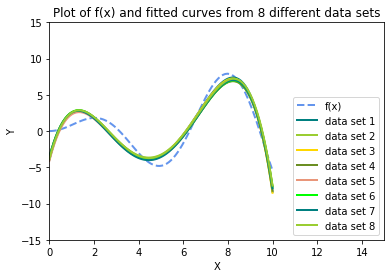

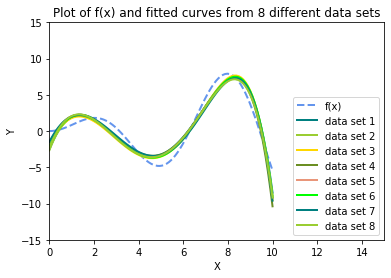

In [9]:
n_samples = 5000
sigma_ = 5
n_datasets = 8
max_degree = 5 

colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html

for degree in range(max_degree+1):
    
    #make a separate figure for each order (constants, linear, quadratic, etc.)
    plt.figure()

    #we will draw a curve of f(x) for reference
    x_curve = np.linspace(0, 10,100)
    y_curve = f(x_curve)
    plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)

    
    for i in range(n_datasets):
        
        #iid samples 
        X,Y = get_data(n_samples,sigma_)

        model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
        model.fit(X[:,np.newaxis], Y)

        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[i%len(colors_fit)], linewidth=2,
                 label="data set %i" % (i+1))



    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, 15)
    plt.ylim(-15, 15)
    plt.title('Plot of f(x) and fitted curves from %i different data sets' %n_datasets )
    plt.legend(loc='lower right')
    plt.show()

Those are close to the 'population model', the best fitting models in expectation  (or as the number of samples goes to infinity).   

With enough i.i.d. data, you can effectively average out the noise (law of large numbers).  You will not learn the true model, though, unless it belongs to the same class you are considering. 

#### But for a small amount of data, what does the prediction look like, averaged over different data sets?

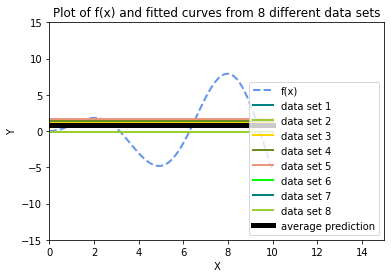

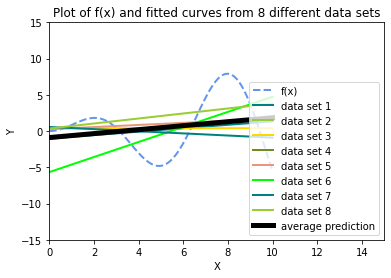

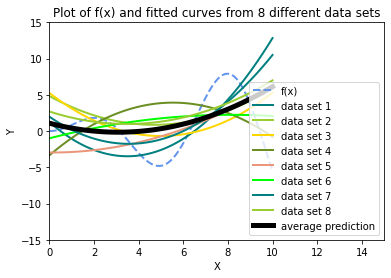

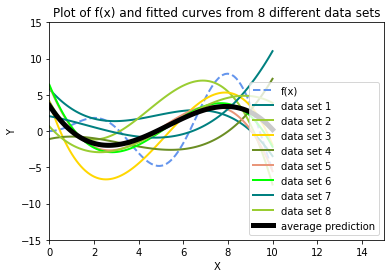

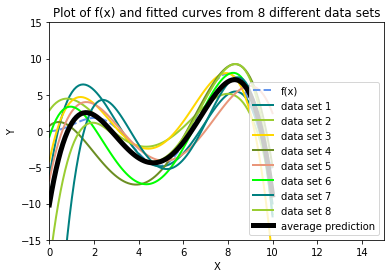

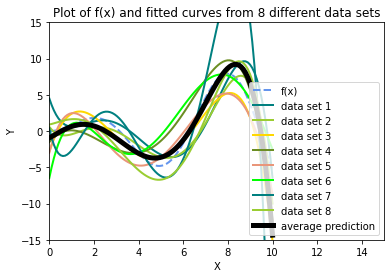

In [10]:
n_samples = 30
sigma_ = 5
n_datasets = 8
max_degree = 5 

colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html

for degree in range(max_degree+1):
    
    #make a separate figure for each order (constants, linear, quadratic, etc.)
    plt.figure()

    #we will draw a curve of f(x) for reference
    x_curve = np.linspace(0, 10,100)
    y_curve = f(x_curve)
    plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)

    #keep an average of the prediction
    y_plot_fit_avg = 0.0*x_curve
    
    for i in range(n_datasets):
        
        #iid samples 
        X,Y = get_data(n_samples,sigma_)

        model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
        model.fit(X[:,np.newaxis], Y)

        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[i%len(colors_fit)], linewidth=2,
                 label="data set %i" % (i+1))

        y_plot_fit_avg += y_plot_fit/n_datasets


    plt.plot(x_curve, y_plot_fit_avg, color='black', linewidth=5,
                 label="average prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, 15)
    plt.ylim(-15, 15)
    plt.title('Plot of f(x) and fitted curves from %i different data sets' %n_datasets )
    plt.legend(loc='lower right')
    plt.show()

With a little algebra, you can show that the average of multiple linear functions is linear, and so on. eg $$\hat{f}(x)=\frac{1}{5}(a_0^1 + a_0^2+\dots+a_0^5)+\frac{1}{5}(a_1^1 + a_1^2+\dots+a_1^5)x$$

#### Questions to think about: 
-- Do the population model and the average model (average of curves over many data sets of the same size) look similar?  

-- How does the expected prediction (with expectation over data sets) using a small amount of data compare to the expected prediction using a huge amount of data?

-- The plots above show the average prediction.  What about the variances of the predictions?

## Training error vs generalization (or 'test') error

When we fit a model to a data set, we can evaluate its goodness of fit using residuals for the samples in the data set.  But how representative is that?

#### Let's first look at training error, for a single data set up to 5th degree polynomial

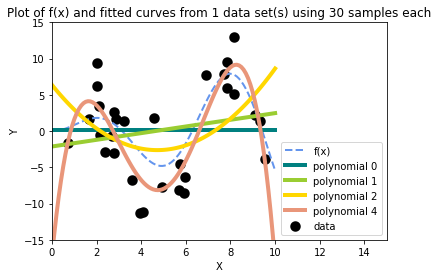

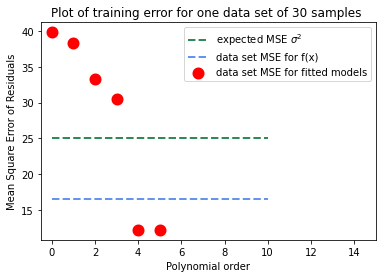

In [11]:
max_degree = 5

n_samples = 30
sigma_ = 5
n_datasets = 1
colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html

plt.figure()

#generate the data set
X,Y = get_data(n_samples,sigma_)
plt.scatter(X, Y, marker='o', s=30,color='black',label='data',linewidth=5) #plot the data points

#draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)


mse_scores = [] #for each polynomial, track training error.

for degree in range(max_degree+1):
    
    model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
    model.fit(X[:,np.newaxis], Y)

    #plot a few curves
    if degree in [0,1,2,max_degree-1]:
        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[degree%len(colors_fit)], linewidth=4,label="polynomial %i" % (degree))
    
    #mean square error (residuals of the data set)
    mse = mean_squared_error(Y, model.predict(X[:,np.newaxis]))
    mse_scores.append(mse)
    #print('Mean squared error for degree %i: %.2f'% (degree,mse))
    

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, max_degree+10)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and fitted curves from %i data set(s) using %i samples each'%(n_datasets,n_samples))
plt.legend(loc='lower right')
plt.show()

#calculate MSE of the correct model (how well f(X) does at predicting Y in the data set)
mse_true_model = mean_squared_error(Y, f(X))

#now plot training error
plt.figure()
plt.scatter(range(max_degree+1), mse_scores,color='red',linewidth=6,label='data set MSE for fitted models')
plt.plot([0,10], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
plt.plot([0,10], [mse_true_model,mse_true_model], '--',color='cornflowerblue', label='data set MSE for f(x)',linewidth=2)
plt.title('Plot of training error for one data set of %i samples '%(n_samples))
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error of Residuals")
#plt.ylim(0,50)
plt.legend(loc='upper right')
plt.xlim(-0.5, max_degree+10)
plt.show()

#### What if we use higher order polynomials?

In theory, can perfectly fit any data set of $n$ samples with an $n-1$ degree polynomial.  Might they be better models to use for predicting future data?  [in practice, there can be numerical computing issues when estimating high-degree polynomials because features are different orders of magnitude]

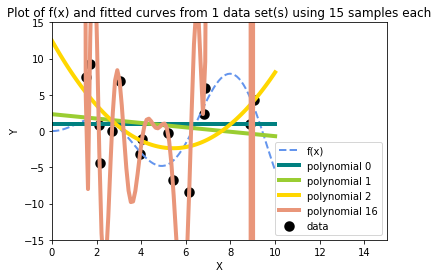

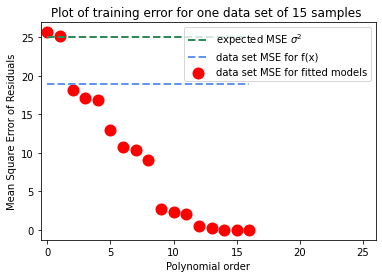

In [12]:
n_samples = 15
max_degree = min(20,n_samples+1)

sigma_ = 5
n_datasets = 1
colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html

plt.figure()

#generate the data set
X,Y = get_data(n_samples,sigma_)
plt.scatter(X, Y, marker='o', s=30,color='black',label='data',linewidth=5) #plot the data points

#draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)


mse_scores = [] #for each polynomial, track training error.

for degree in range(max_degree+1):
    
    model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), LinearRegression())
    model.fit(X[:,np.newaxis], Y)

    #plot a few curves
    if degree in [0,1,2,max_degree]:
        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[degree%len(colors_fit)], linewidth=4,label="polynomial %i" % (degree))
    
    #mean square error (residuals of the data set)
    mse = mean_squared_error(Y, model.predict(X[:,np.newaxis]))
    mse_scores.append(mse)
    #print('Mean squared error for degree %i: %.2f'% (degree,mse))
    

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 15)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and fitted curves from %i data set(s) using %i samples each'%(n_datasets,n_samples))
plt.legend(loc='lower right')
plt.show()

#calculate MSE of the correct model (how well f(X) does at predicting Y in the data set)
mse_true_model = mean_squared_error(Y, f(X))

#now plot training error
plt.figure()
plt.scatter(range(max_degree+1), mse_scores,color='red',linewidth=6,label='data set MSE for fitted models')
plt.plot([0,max_degree], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
plt.plot([0,max_degree], [mse_true_model,mse_true_model], '--',color='cornflowerblue', label='data set MSE for f(x)',linewidth=2)
plt.title('Plot of training error for one data set of %i samples '%(n_samples))
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error of Residuals")
#plt.ylim(0,50)
plt.legend(loc='upper right')
plt.xlim(-0.5, max_degree+10)
plt.show()

minor note: We won't actually see a perfect fit for sufficiently high polynomials (here degree>=29), though it works for small data sets (10 points and use 9th order polynomial). There are numerical issues we run into using high order polynomials.  The (artificial) features are x, $x^2$, ..., $x^{30}$, but for a sample with x=8, that feature has a value of $8^{30}$, which  is really big compared to $8^1$ and $8^2$.  The curve (and thus predictions) are sensitive to changes in the coefficient for $x^{30}$ because that feature's value is so large.

We are using a data preprocessing step of 'Standardization' which helps partly alleviate this. That preprocessing step will be useful more broadly (for more than just for polynomial regression), but polynomials (up to a high order) are not usually a great model class to use.  We are mainly using them because they are simple to explain and we can easily visualize them (with a horizontal axis for a single feature).

### So far, we have just looked at fit on the data set itself.  But clearly in experiments above higher-order polynomials are fitting the trend+noise (overfitting).  Let's see how good those models are on future data.  Now let's first look at 'test error' (expected error on future data).

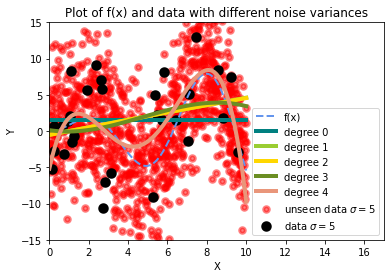

In [13]:
n = 30
sigma_ = 5

colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html


plt.figure()


#iid test samples to plot   -- plot in background
X,Y = get_data(1000,sigma_)
label_ = r'unseen data $\sigma=$%i'%(sigma_)
plt.scatter(X, Y, marker='o', s=30,color='red',alpha=.5,label=label_,linewidth=3) #plot the data points


#draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)


#data set for fitting
    
X,Y = get_data(n,sigma_)
label_ = r'data $\sigma=$%i'%(sigma_)

plt.scatter(X, Y, marker='o', s=30,color='black',label=label_,linewidth=5) #plot the data points

#now fit for multiple polynomials (each power is treated as a separate feature in a linear regression model)
for count, degree in enumerate([0,1,2,3,4]):
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression(normalize=True))
    model.fit(X[:,np.newaxis], Y)
    y_plot_fit = model.predict(x_curve[:,np.newaxis])
    plt.plot(x_curve, y_plot_fit, color=colors_fit[count], linewidth=4,
             label="degree %d" % degree)


    
    
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 17)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and data with different noise variances')
plt.legend(loc='lower right')
plt.show()

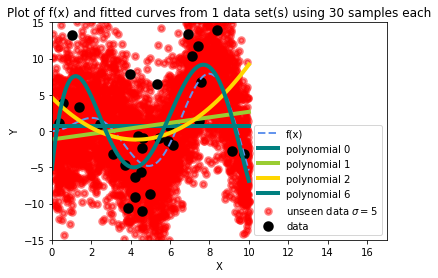

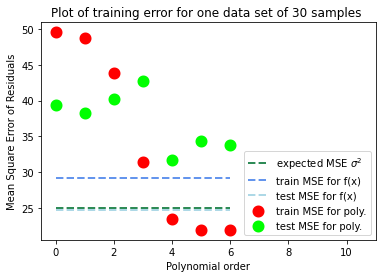

In [22]:
max_degree = 6

n_samples = 30
sigma_ = 5
n_datasets = 1

colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html


plt.figure()


#iid test samples to plot   -- plot in background 
test_X,test_Y = get_data(5000,sigma_)
label_ = r'unseen data $\sigma=$%i'%(sigma_)
plt.scatter(test_X, test_Y, marker='o', s=30,color='red',alpha=.5,label=label_,linewidth=3) 


X,Y = get_data(n_samples,sigma_)
plt.scatter(X, Y, marker='o', s=30,color='black',label='data',linewidth=5) #plot the data points

#draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)



mse_scores = [] #for each polynomial, track training error. (eg fit on the data set)
mse_scores_test = [] #for each polynomial, track training error. (eg. fit on future data)

for degree in range(max_degree+1):
    
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    model.fit(X[:,np.newaxis], Y)

    #plot a few curves
    if degree in [0,1,2,max_degree]:
        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[degree%len(colors_fit)], linewidth=4,label="polynomial %i" % (degree))
    
    mse = mean_squared_error(Y, model.predict(X[:,np.newaxis]))
    mse_scores.append(mse)
    #print('Mean squared error on data set for degree %i: %.2f' % (degree,mse))
    
    mse_test = mean_squared_error(test_Y, model.predict(test_X[:,np.newaxis]))
    mse_scores_test.append(mse_test)
    #print('Mean squared error on data set for degree %i: %.2f' % (degree,mse_test))
    

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 17)
plt.ylim(-15, 15)
plt.title('Plot of f(x) and fitted curves from %i data set(s) using %i samples each'%(n_datasets,n_samples))
plt.legend(loc='lower right')
plt.show()

#calculate training MSE of the correct model
mse_true_model = mean_squared_error(Y, f(X))
#calculate training MSE of the correct model on test data
mse_true_model_test = mean_squared_error(test_Y, f(test_X))

#now plot training error
plt.figure()
plt.scatter(range(max_degree+1), mse_scores,color='red',linewidth=6,label='train MSE for poly.')
plt.scatter(range(max_degree+1), mse_scores_test,color='lime',linewidth=6,label='test MSE for poly.')

plt.plot([0,max_degree], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
plt.plot([0,max_degree], [mse_true_model,mse_true_model], '--',color='cornflowerblue', label='train MSE for f(x)',linewidth=2)
plt.plot([0,max_degree], [mse_true_model_test,mse_true_model_test], '--',color='lightblue', label='test MSE for f(x)',linewidth=2)

plt.title('Plot of training error for one data set of %i samples '%(n_samples))
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error of Residuals")
plt.xlim([-.5,max_degree+5])
#plt.ylim(0,50)
plt.legend(loc='lower right')
plt.show()

#### Each time we run these (or earlier cells) we see different results, because we have a different set of data to fit (or 'train') with.  We can consider looking at the performance repeating this over many random data sets.  (you can even 'ctrl'+'enter' in the cell above to rerun it and see it vary)

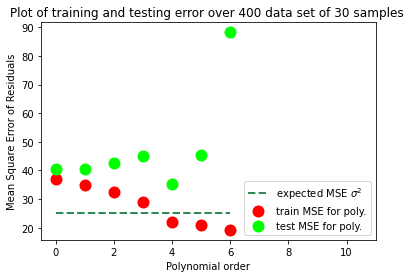

In [23]:
max_degree = 6

n_samples = 30 #number used for fitting 

sigma_ = 5

n_datasets = 400 

# Generate one large test data set
test_X,test_Y = get_data(5000,sigma_)

#create arrays to store MSE for each fitted model (both MSE on data fit with and on test data)
mse_scores_train = np.zeros((n_datasets,max_degree+1))
mse_scores_test = np.zeros((n_datasets,max_degree+1))


for i in range(n_datasets):
    
    #generate data set
    X,Y = get_data(n_samples,sigma_)
    
    for degree in range(max_degree+1):

        model = make_pipeline(PolynomialFeatures(degree),StandardScaler(),  LinearRegression())
        model.fit(X[:,np.newaxis], Y)

        #train mse
        mse = mean_squared_error(Y, model.predict(X[:,np.newaxis]))
        mse_scores_train[i,degree] = mse
        #print('Mean squared error on data set for degree %i: %.2f' % (degree,mse))
        
        #test mse
        mse_test = mean_squared_error(test_Y, model.predict(test_X[:,np.newaxis]))
        mse_scores_test[i,degree] = mse_test
        #print('Mean squared error on data set for degree %i: %.2f' % (degree,mse_test))


#Now look at average and variance of the MSEs 
mse_scores_train_mean = np.mean(mse_scores_train,axis=0)
mse_scores_train_std = np.std(mse_scores_train,axis=0)

mse_scores_test_mean = np.mean(mse_scores_test,axis=0)
mse_scores_test_std = np.std(mse_scores_test,axis=0)

#print(mse_scores_train)
#print(mse_scores_train_mean)


#now plot training error
plt.figure()
plt.scatter(range(max_degree+1), mse_scores_train_mean,color='red',linewidth=6,label='train MSE for poly.')
plt.scatter(range(max_degree+1), mse_scores_test_mean,color='lime',linewidth=6,label='test MSE for poly.')

plt.plot([0,max_degree], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
#plt.plot([0,14], [mse_true_model,mse_true_model], '--',color='cornflowerblue', label='train MSE for f(x)',linewidth=2)
#plt.plot([0,14], [mse_true_model_test,mse_true_model_test], '--',color='lightblue', label='test MSE for f(x)',linewidth=2)

plt.title('Plot of training and testing error over %i data set of %i samples '%(n_datasets,n_samples))
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error of Residuals")
#plt.ylim(0,50)
plt.xlim([-.5,max_degree+5])
plt.legend(loc='lower right')
plt.show()

#### So that plot shows average results over many repeated trials (each time generate a data set of $n=30$ samples, fit polynomials of different orders, evaluate them on the big test data set, repeat).

### What if the training set had more data?

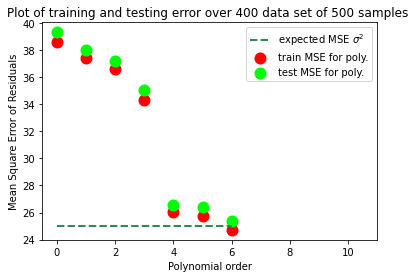

In [24]:
max_degree = 6

n_samples = 500 #number used for fitting 

sigma_ = 5

n_datasets = 400 

# Generate one large test data set
test_X,test_Y = get_data(5000,sigma_)

#create arrays to store MSE for each fitted model (both MSE on data fit with and on test data)
mse_scores_train = np.zeros((n_datasets,max_degree+1))
mse_scores_test = np.zeros((n_datasets,max_degree+1))


for i in range(n_datasets):
    
    #generate data set
    X,Y = get_data(n_samples,sigma_)
    
    for degree in range(max_degree+1):

        model = make_pipeline(PolynomialFeatures(degree),StandardScaler(),  LinearRegression())
        model.fit(X[:,np.newaxis], Y)

        #train mse
        mse = mean_squared_error(Y, model.predict(X[:,np.newaxis]))
        mse_scores_train[i,degree] = mse
        #print('Mean squared error on data set for degree %i: %.2f' % (degree,mse))
        
        #test mse
        mse_test = mean_squared_error(test_Y, model.predict(test_X[:,np.newaxis]))
        mse_scores_test[i,degree] = mse_test
        #print('Mean squared error on data set for degree %i: %.2f' % (degree,mse_test))


#Now look at average and variance of the MSEs 
mse_scores_train_mean = np.mean(mse_scores_train,axis=0)
mse_scores_train_std = np.std(mse_scores_train,axis=0)

mse_scores_test_mean = np.mean(mse_scores_test,axis=0)
mse_scores_test_std = np.std(mse_scores_test,axis=0)

#print(mse_scores_train)
#print(mse_scores_train_mean)


#now plot training error
plt.figure()
plt.scatter(range(max_degree+1), mse_scores_train_mean,color='red',linewidth=6,label='train MSE for poly.')
plt.scatter(range(max_degree+1), mse_scores_test_mean,color='lime',linewidth=6,label='test MSE for poly.')

plt.plot([0,max_degree], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
#plt.plot([0,14], [mse_true_model,mse_true_model], '--',color='cornflowerblue', label='train MSE for f(x)',linewidth=2)
#plt.plot([0,14], [mse_true_model_test,mse_true_model_test], '--',color='lightblue', label='test MSE for f(x)',linewidth=2)

plt.title('Plot of training and testing error over %i data set of %i samples '%(n_datasets,n_samples))
plt.xlabel("Polynomial order")
plt.ylabel("Mean Square Error of Residuals")
#plt.ylim(0,50)
plt.xlim([-.5,max_degree+5])
plt.legend(loc='upper right')
plt.show()

#### So if we have a *lot* of i.i.d. data in each data set, then training error is close to the testing/generalization error, but often we don't have enough, and getting more may be infeasible or too costly.  We'll have to figure out how to do the best we can with the data we have

### Question: What if we 'pretended' to have future data by only fitting with part of the data set?

For examples, our data set has 30 samples.  We can use 20 samples for fitting, and then the remaining 10 samples we can evaluate the fitted models on.  Since the models were only fit with 20, those 10 will (statistically) be like having future data 
- the subset of samples we use for fitting, we'll call the 'training set'
- the subset of samples we don't use for fitting, we'll call the 'test set' *but* that is still part of the original dataset (e.g. 30 samples).  In this notebook, we know the generative model, so for evaluation we can generate extra data we'll also refer to as test data.
- when we get into more details in future lectures, we'll use two hold-out sets, a 'validation set' for picking hyper-parameters (such as polynomial order), and then use the 'test set' at the very end with our final, picked model

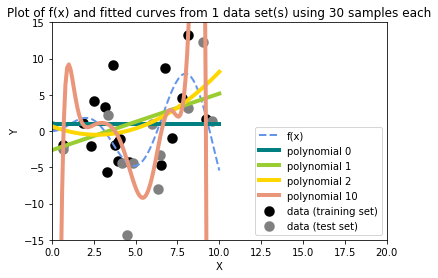

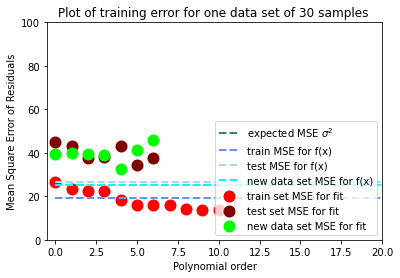

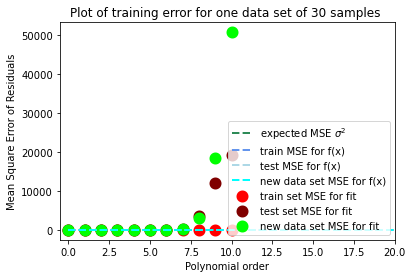

In [27]:
max_degree = 10

n_samples = 30
sigma_ = 5
n_datasets = 1
colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html


plt.figure()

#we will draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)



#iid samples to plot

#iid test samples  (new data set) to plot   -- put in background 
X_new,Y_new = get_data(5000,sigma_)
#label_ = r'unseen data $\sigma=$%i'%(sigma_)
#plt.scatter(test_X, test_Y, marker='o', s=30,color='red',alpha=.5,label=label_,linewidth=3) #plot the data points

#generate data set
X,Y = get_data(n_samples,sigma_)

#Split up the data set into a 'training set' and a 'test set'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

plt.scatter(X_train, Y_train, marker='o', s=30,color='black',label='data (training set)',linewidth=5) #plot the data points
plt.scatter(X_test, Y_test, marker='o', s=30,color='gray',label='data (test set)',linewidth=5) #plot the data points

mse_scores_train = [] #for each polynomial, track training error.
mse_scores_test = []
mse_scores_test_new = [] #on the new data set

for degree in range(max_degree+1):
    
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    model.fit(X_train[:,np.newaxis], Y_train)

    #plot a few curves
    if degree in [0,1,2,max_degree]:
        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[degree%len(colors_fit)], linewidth=4,label="polynomial %i" % (degree))
    
    #print('\n')
    #evaluate the training error
    mse_train = mean_squared_error(Y_train, model.predict(X_train[:,np.newaxis]))
    mse_scores_train.append(mse_train)
    #print('Mean squared error on training set for degree %i: %.2f' % (degree,mse_train))
    
    #evaluate the test error using the held out samples from the data set
    mse_test = mean_squared_error(Y_test, model.predict(X_test[:,np.newaxis]))
    mse_scores_test.append(mse_test)
    #print('Mean squared error on test set for degree %i: %.2f' % (degree,mse_test))    
    
    #evaluate the test error using a new data set
    mse_test_new = mean_squared_error(Y_new, model.predict(X_new[:,np.newaxis]))
    mse_scores_test_new.append(mse_test_new)
    #print('Mean squared error on independent data set for degree %i: %.2f' % (degree,mse_test_new))
    

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, max_degree+10) 
plt.ylim(-15, 15)
plt.title('Plot of f(x) and fitted curves from %i data set(s) using %i samples each'%(n_datasets,n_samples))
plt.legend(loc='lower right')
plt.show()

#calculate training MSE of the correct model
mse_true_model_train = mean_squared_error(Y_train, f(X_train))

#calculate test set MSE of the correct model
mse_true_model_test = mean_squared_error(Y_test, f(X_test))

#calculate training MSE of the correct model on new data set
mse_true_model_test_new = mean_squared_error(Y_new, f(X_new))

#now plot error of fitted models on data set (both the 'training set' and 'test set') and the larger independent data set
for ylim in [True,False]:
    plt.figure()
    plt.scatter(range(max_degree+1), mse_scores_train,color='red',linewidth=6,label='train set MSE for fit')
    plt.scatter(range(max_degree+1), mse_scores_test,color='maroon',linewidth=6,label='test set MSE for fit')
    plt.scatter(range(max_degree+1), mse_scores_test_new,color='lime',linewidth=6,label='new data set MSE for fit')


    plt.plot([0,max_degree+10], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
    plt.plot([0,max_degree+10], [mse_true_model_train,mse_true_model_train], '--',color='cornflowerblue', label='train MSE for f(x)',linewidth=2)
    plt.plot([0,max_degree+10], [mse_true_model_test,mse_true_model_test], '--',color='lightblue', label='test MSE for f(x)',linewidth=2)
    plt.plot([0,max_degree+10], [mse_true_model_test_new,mse_true_model_test_new], '--',color='cyan', label='new data set MSE for f(x)',linewidth=2)


    plt.title('Plot of training error for one data set of %i samples '%(n_samples))
    plt.xlabel("Polynomial order")
    plt.ylabel("Mean Square Error of Residuals")
    plt.xlim(-0.5,max_degree+10)
    if ylim:
        plt.ylim(0,100)
    plt.legend(loc='lower right')
    plt.show()

The MSE of the fitted models on the small 'test set' roughly exhibits the trend of the bigger new data set (which we won't have in practice).   

### What if we use more samples for the test set (and fewer for fitting)?

out of 30 samples total, 20 for test set, 10 for training set

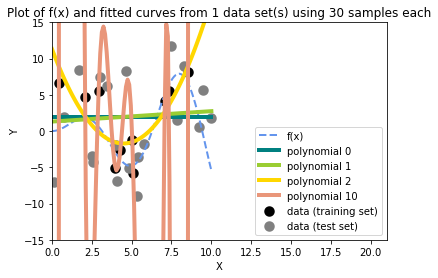

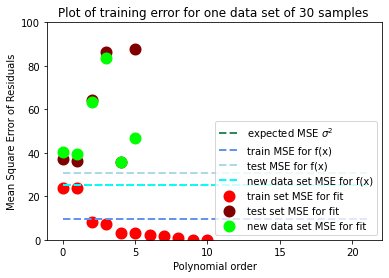

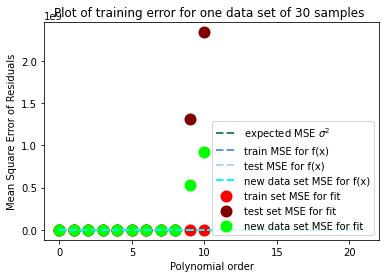

In [29]:
max_degree = 10+1

n_samples = 30
sigma_ = 5
n_datasets = 1
colors_fit = ['teal', 'yellowgreen', 'gold','olivedrab','darksalmon','lime'] 
#for a gallery of named colors, see https://matplotlib.org/stable/gallery/color/named_colors.html


plt.figure()

#we will draw a curve of f(x) for reference
x_curve = np.linspace(0, 10,100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, '--',color='cornflowerblue', label='f(x)',linewidth=2)



#iid samples to plot

#iid test samples  (new data set) to plot   -- put in background 
X_new,Y_new = get_data(5000,sigma_)
#label_ = r'unseen data $\sigma=$%i'%(sigma_)
#plt.scatter(test_X, test_Y, marker='o', s=30,color='red',alpha=.5,label=label_,linewidth=3) #plot the data points

#generate data set
X,Y = get_data(n_samples,sigma_)

#Split up the data set into a 'training set' and a 'test set'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=2/3)

plt.scatter(X_train, Y_train, marker='o', s=30,color='black',label='data (training set)',linewidth=5) #plot the data points
plt.scatter(X_test, Y_test, marker='o', s=30,color='gray',label='data (test set)',linewidth=5) #plot the data points

mse_scores_train = [] #for each polynomial, track training error.
mse_scores_test = []
mse_scores_test_new = [] #on the new data set

for degree in range(max_degree):
    
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    model.fit(X_train[:,np.newaxis], Y_train)

    #plot a few curves
    if degree in [0,1,2,max_degree-1]:
        y_plot_fit = model.predict(x_curve[:,np.newaxis])
        plt.plot(x_curve, y_plot_fit, color=colors_fit[degree%len(colors_fit)], linewidth=4,label="polynomial %i" % (degree))
    
    #print('\n')
    #evaluate the training error
    mse_train = mean_squared_error(Y_train, model.predict(X_train[:,np.newaxis]))
    mse_scores_train.append(mse_train)
    #print('Mean squared error on training set for degree %i: %.2f' % (degree,mse_train))
    
    #evaluate the test error using the held out samples from the data set
    mse_test = mean_squared_error(Y_test, model.predict(X_test[:,np.newaxis]))
    mse_scores_test.append(mse_test)
    #print('Mean squared error on test set for degree %i: %.2f' % (degree,mse_test))    
    
    #evaluate the test error using a new data set
    mse_test_new = mean_squared_error(Y_new, model.predict(X_new[:,np.newaxis]))
    mse_scores_test_new.append(mse_test_new)
    #print('Mean squared error on independent data set for degree %i: %.2f' % (degree,mse_test_new))
    

plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, max_degree+10) 
plt.ylim(-15, 15)
plt.title('Plot of f(x) and fitted curves from %i data set(s) using %i samples each'%(n_datasets,n_samples))
plt.legend(loc='lower right')
plt.show()

#calculate training MSE of the correct model
mse_true_model_train = mean_squared_error(Y_train, f(X_train))

#calculate test set MSE of the correct model
mse_true_model_test = mean_squared_error(Y_test, f(X_test))

#calculate training MSE of the correct model on new data set
mse_true_model_test_new = mean_squared_error(Y_new, f(X_new))

#now plot error of fitted models on data set (both the 'training set' and 'test set') and the larger independent data set
for ylim in [True,False]:
    plt.figure()
    plt.scatter(range(max_degree), mse_scores_train,color='red',linewidth=6,label='train set MSE for fit')
    plt.scatter(range(max_degree), mse_scores_test,color='maroon',linewidth=6,label='test set MSE for fit')
    plt.scatter(range(max_degree), mse_scores_test_new,color='lime',linewidth=6,label='new data set MSE for fit')


    plt.plot([0,max_degree+10], [sigma_**2,sigma_**2], '--',color='seagreen', label=r'expected MSE $\sigma^2$',linewidth=2)
    plt.plot([0,max_degree+10], [mse_true_model_train,mse_true_model_train], '--',color='cornflowerblue', label='train MSE for f(x)',linewidth=2)
    plt.plot([0,max_degree+10], [mse_true_model_test,mse_true_model_test], '--',color='lightblue', label='test MSE for f(x)',linewidth=2)
    plt.plot([0,max_degree+10], [mse_true_model_test_new,mse_true_model_test_new], '--',color='cyan', label='new data set MSE for f(x)',linewidth=2)


    plt.title('Plot of training error for one data set of %i samples '%(n_samples))
    plt.xlabel("Polynomial order")
    plt.ylabel("Mean Square Error of Residuals")
    if ylim:
        plt.ylim(0,100)
    plt.legend(loc='lower right')
    plt.show()

#### If we use little data for training, we might be able to better estimate the fitted models' performance on future data, but those models may be worse (since not using 'enough' for fitting).  

#### Idea: Using the test set MSE (held-out samples from the fitting process) as a criteria for picking which of these polynomials to choose

#### Question: Does it matter *which* samples we use? 
#### Question: How many samples should we use?

What happens if we pick samples numbered 20-30 where the samples are ordered by increasing X? decreasing X? increasing Y? decreasing Y?

Try varying non-linearity of f(x), noise variance, and the number of samples